In [89]:
import random
import operator
import numpy as np
import pandas as pd


df = pd.read_csv('/content/mushrooms.csv')

df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


<ipython-input-90-cd03c552c973>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='class'>

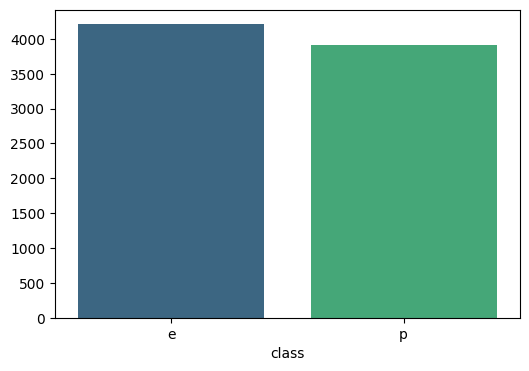

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
target = 'class'
class_counts = df['class'].value_counts()

# Crear el plot
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

In [91]:
def convert_to_binary(df):
    """
    Convierte los atributos de un DataFrame a binarios o one-hot,
    sin modificar los atributos que ya son binarios.

    Parámetros:
    df : pd.DataFrame
        El DataFrame a convertir.

    Retorna:
    pd.DataFrame
        Un nuevo DataFrame con las columnas convertidas a formato binario o one-hot.
    """
    df_binary = df.copy()

    for column in df_binary.columns:
        # Verifica si la columna es binaria (0/1)
        if df_binary[column].dtype in ['int64', 'float64']:
            if df_binary[column].nunique() == 2:
                df_binary[column].astype(int)  # No modificar columnas binarias
            elif df_binary[column].nunique() > 3:
                # Aplica binning y luego one-hot
                df_binned = pd.cut(df_binary[column], bins=3, labels=False)
                df_one_hot = pd.get_dummies(df_binned, prefix=column)
                df_binary = pd.concat([df_binary, df_one_hot], axis=1).astype(int)
                df_binary.drop(column, axis=1, inplace=True)
            else:
                # Aplica one-hot directamente
                df_one_hot = pd.get_dummies(df_binary[column], prefix=column)
                df_binary = pd.concat([df_binary, df_one_hot], axis=1).astype(int)
                df_binary.drop(column, axis=1, inplace=True)
        elif df_binary[column].dtype == 'object':
            # Si la columna es categórica, aplica one-hot
            df_one_hot = pd.get_dummies(df_binary[column], prefix=column)
            df_binary = pd.concat([df_binary, df_one_hot], axis=1)
            df_binary.drop(column, axis=1, inplace=True)

    return df_binary

In [92]:
df_bin = convert_to_binary(df)
df_bin.columns

Index(['class_e', 'class_p', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f',
       'cap-surface_g',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=119)

In [93]:
print(df.shape)
# datos = df.to_numpy()
X = df_bin.drop(['class_e', 'class_p'], axis = 1)
Y = df_bin['class_p']

# separar en train y test (80%/20%)
from sklearn.model_selection import train_test_split

# Separa en train y test (80% train, 20% test)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42, stratify = Y)

print(len(Xtrain), len(Xtest))

(8124, 23)
6499 1625


In [94]:
X.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [95]:
import operator
import random
import copy
# Definir los operadores lógicos
OPERATORS = {
    'AND': operator.and_,
    'OR': operator.or_,
    'NOT': lambda x: not x  # La función de not solo recibe un argumento.
}

# Clase para representar un nodo del árbol
class Node:
    def __init__(self, value, left=None, right=None, depth = 0):
        self.depth = depth
        self.value = value  # Puede ser un operador o una variable
        self.left = left  # Hijo izquierdo (si es operador)
        self.right = right  # Hijo derecho (si es operador binario)
    def evaluate(self, variables):
        """
        Evalúa el nodo recursivamente.
        'variables' es un diccionario que mapea nombres de variables a sus valores (0 o 1).
        """
        if self.value in OPERATORS:  # Si el valor es un operador
            if self.value == 'NOT':
                # Si es NOT, solo evalúa el hijo izquierdo
                return OPERATORS[self.value](self.left.evaluate(variables))
            else:
                # Si es AND o OR, evalúa ambos hijos
                return OPERATORS[self.value](self.left.evaluate(variables), self.right.evaluate(variables))
        else:
            # Si es una variable, devuelve su valor
            return variables[self.value]

    def copy(self):
        # Copiar el nodo actual (sin compartir referencias de los nodos hijos)
        new_node = Node(self.value, depth=self.depth)

        # Copiar los nodos hijos de manera recursiva
        if self.left:
            new_node.left = self.left.copy()
        if self.right:
            new_node.right = self.right.copy()

        return new_node

    def __str__(self):
        """
        Representación en string del nodo y su subárbol.
        """
        if self.value in OPERATORS:
            if self.value == 'NOT':
                return f"(NOT {self.left})"
            return f"({self.left} {self.value} {self.right})"
        else:
            return str(self.value)

    def print_tree(self, level=0):
        """
        Imprime el árbol con una representación visual simple,
        usando conectores para operadores y operandos.
        """
        indent = "    " * level  # Sangría según el nivel de profundidad

        # Imprimir el valor dlel nodo actual (operador o operando)
        print(f" {self.value}")

        # Si el nodo tiene ambos hijos
        if self.left and self.right:
            # Dibujar la rama izquierda con un conector '├──'
            if self.left:
                print(f"{indent}├──", end="")
                self.left.print_tree(level + 1)
            # Dibujar la rama derecha con un conector '└──'
            if self.right:
                print(f"{indent}└──", end="")
                self.right.print_tree(level + 1)

        # Si solo hay un hijo izquierdo
        elif self.left:
            print(f"{indent}└──", end="")  # Usar '└──' para el único hijo
            self.left.print_tree(level + 1)

        # Si solo hay un hijo derecho
        elif self.right:
            print(f"{indent}└──", end="")  # Usar '└──' para el único hijo
            self.right.print_tree(level + 1)

# Función para generar un árbol de operadores aleatorio
def generate_random_tree(variables, max_depth=3, actual_depth = 0):
    if max_depth == 0 or (max_depth > 0 and random.random() < 0.3):  # Profundidad o probabilidad de detener
        return Node(random.choice(variables), depth = actual_depth )  # Crear una hoja (variable)
    else:
        operator = random.choice(list(OPERATORS.keys()))  # Elegir un operador aleatorio
        if operator == 'NOT':
            return Node(operator, left=generate_random_tree(variables, max_depth-1, actual_depth+1), depth = actual_depth)  # NOT solo tiene un hijo
        else:
            # AND y OR tienen dos hijos
            return Node(operator, left=generate_random_tree(variables, max_depth-1, actual_depth+1),
                        right=generate_random_tree(variables, max_depth-1, actual_depth+1), depth = actual_depth)

# Ejemplo de uso
if __name__ == "__main__":
    variables = ['x1', 'x2', 'x3', 'x4']  # Variables disponibles
    tree = generate_random_tree(variables, max_depth=5)  # Generar un árbol con profundidad 3
    print("Árbol generado:", tree)
    # Evaluar el árbol con diferentes asignaciones de variables
    assignment = {'x1': 1, 'x2': 0, 'x3': 1, 'x4': 1}
    print("Evaluación con variables:", assignment)
    print("Resultado:", tree.evaluate(assignment))
    tree.print_tree()

Árbol generado: x3
Evaluación con variables: {'x1': 1, 'x2': 0, 'x3': 1, 'x4': 1}
Resultado: 1
 x3


In [105]:
# Xtrain = Xtrain.to_numpy()
Xtest  = Xtest.to_numpy()


In [106]:
def generate_mapping(individuo):
    assigment = {}
    for i in range(len(individuo)):
        assigment['x'+str(i+1)] = individuo[i]
    return assigment

XtrainDict = []
for i in range(len(Xtrain)):
    XtrainDict.append(generate_mapping(Xtrain[i]))
XtestDict = []
for i in range(len(Xtest)):
    XtestDict.append(generate_mapping(Xtest[i]))


In [107]:
def generate_population(population_size, max_depth = 6):
    population = []
    variables = []
    for i in range(len(Xtrain[1])):
        variables.append('x'+str(i+1))
    for i in range(population_size):
        population.append(generate_random_tree(variables, max_depth=max_depth))
    return population, variables

In [108]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

# función auxiliar para calcular el fitness de una población
def fitness_poblacion(poblacion, umbral = 0.5, metrica = 'f1'):
  predicciones = np.empty((len(Xtrain),len(poblacion)))
  for i in range(len(poblacion)):
    for j in range(len(Xtrain)):
      predicciones[j,i] = poblacion[i].evaluate(XtrainDict[j])
  y_pred = (predicciones >= umbral).astype(int)
  y_true = Ytrain
  scores = np.empty(y_pred.shape[1])

  if metrica == 'f1':
    for i in range(y_pred.shape[1]):
      tp = np.sum((y_true == 1) & (y_pred[:,i] == 1))

      # False Positives (FP): y_true == 0 y y_pred == 1
      fp = np.sum((y_true == 0) & (y_pred[:,i] == 1))

      # False Negatives (FN): y_true == 1 y y_pred == 0
      fn = np.sum((y_true == 1) & (y_pred[:,i] == 0))

      # Calcular Precision y Recall
      precision = tp / (tp + fp) if (tp + fp) > 0 else 0
      recall = tp / (tp + fn) if (tp + fn) > 0 else 0

      # Calcular F1-score
      if precision + recall == 0:
          scores[i] = 0
      else:
        scores[i] = 2 * (precision * recall) / (precision + recall)

  elif metrica == 'acc':
    for i in range(y_pred.shape[1]):
      correct_predictions = np.sum(y_true == y_pred[:,i])

      # Calcular el accuracy
      scores[i] = correct_predictions / len(y_true)

  return scores

def fitness(individuo, umbral = 0.5, metrica = 'f1'):
  probs = np.empty(len(Xtrain))
  for j in range(len(Xtrain)):
      probs[j] = individuo.evaluate(XtrainDict[j])
  y_pred = (probs >= umbral).astype(int)
  y_true = Ytrain
  if metrica == 'f1':
    tp = np.sum((y_true == 1) & (y_pred == 1))

    # False Positives (FP): y_true == 0 y y_pred == 1
    fp = np.sum((y_true == 0) & (y_pred == 1))

    # False Negatives (FN): y_true == 1 y y_pred == 0
    fn = np.sum((y_true == 1) & (y_pred == 0))

    # Calcular Precision y Recall
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    # Calcular F1-score
    if precision + recall == 0:
        return 0.0
    return 2 * (precision * recall) / (precision + recall)

  elif metrica == 'acc':
    return np.sum(y_true == y_pred) / len(y_true)


In [ ]:
poblacion = generate_population(50)
# fitnessPob =  fitness_poblacion(poblacion, umbral = 0.5, metrica = 'f1')

In [109]:
def seleccion_torneo(fitnessPoblacion, poblacion, k):
    """
    Selección por torneo para algoritmos genéticos.

    :param poblacion: numpy array, la población de soluciones
    :param fitnessPoblacion: numpy array, la evaluación de aptitud de cada solución en la población
    :param k: int, el tamaño del torneo
    :return: numpy array, la población seleccionada después del torneo
    """
    seleccionados = []
    for _ in range(len(poblacion)):
        # Seleccionar índices aleatorios para el torneo
        indices_torneo = np.random.choice(len(poblacion), k, replace=False)
        ganador = indices_torneo[np.argmax(fitnessPoblacion[indices_torneo])]
        # Agregar el ganador a los seleccionados
        seleccionados.append(poblacion[ganador])

    return np.array(seleccionados)

In [117]:
import random

MAX_DEPTH = Xtrain.shape[1]//2  # Profundidad máxima permitida para los árboles

# Mutación de operadores: cambia el operador lógico
def mutate_operator(node):
    if node.value in OPERATORS:  # Solo muta si es un operador
        possible_operators = list(OPERATORS.keys())
        possible_operators.remove(node.value)  # Elimina el operador actual para evitar duplicado
        node.value = random.choice(possible_operators)
    return node

# Mutación de operandos: cambia el operando por otro de la lista de variables
def mutate_operand(node, variables):
    if node.value not in OPERATORS:  # Solo muta si es una variable
        possible_variables = variables[:]
        possible_variables.remove(node.value)  # Elimina la variable actual
        node.value = random.choice(possible_variables)  # Asigna una nueva variable
    return node




### Función de cruce
# Función auxiliar para medir la profundidad de un árbol
def tree_depth(node):
    if node is None:
        return 0
    elif node.left is None and node.right is None:
        return 1
    else:
        left_depth = tree_depth(node.left) if node.left else 0
        right_depth = tree_depth(node.right) if node.right else 0
        return 1 + max(left_depth, right_depth)



# Función auxiliar para contar todos los nodos en un árbol/subárbol
def count_nodes(node):
    if node is None:
        return 0
    return 1 + count_nodes(node.left) + count_nodes(node.right)

def contar_operandos_y_operadores(nodo):
    """
    Función recursiva que cuenta cuántos operandos (hojas) y operadores (nodos internos)
    hay en un árbol binario.

    Devuelve una tupla (num_operandos, num_operadores).
    """
    if nodo is None:
        return (0, 0)  # No hay nodos en esta rama

    # Si el nodo no tiene hijos, es un operando (hoja)
    if not nodo.left and not nodo.right:
        return (1, 0)  # 1 operando, 0 operadores

    # Si tiene hijos, es un operador
    num_operandos_izq, num_operadores_izq = contar_operandos_y_operadores(nodo.left)
    num_operandos_der, num_operadores_der = contar_operandos_y_operadores(nodo.right)

    # Sumar 1 al número de operadores, ya que este nodo es un operador
    num_operadores = 1 + num_operadores_izq + num_operadores_der
    num_operandos = num_operandos_izq + num_operandos_der

    return (num_operandos, num_operadores)

# Función para obtener un nodo aleatorio con probabilidad similar para cada nodo
def get_random_node(node, depth=0, max_depth=MAX_DEPTH):
    num_operandos, num_operadores = contar_operandos_y_operadores(node)
    """
    Escoge un nodo aleatorio en el árbol, asegurando que cada nodo tenga una probabilidad similar de ser elegido.
    """
    if depth >= max_depth or (not node.left and not node.right):  # Nodo hoja o profundidad máxima
        return node

    left_count = count_nodes(node.left) if node.left else 0
    right_count = count_nodes(node.right) if node.right else 0
    total_count = 1 + left_count + right_count  # Incluir el nodo actual

    # Elegir aleatoriamente entre el nodo actual, la rama izquierda y la rama derecha
    choice = random.randint(1, total_count)  # Generar un número entre 1 y el número total de nodos

    if choice == 1:
        return node  # Elegimos el nodo actual
    elif choice <= 1 + left_count:
        return get_random_node(node.left, depth+1, max_depth)  # Elegir un nodo en la rama izquierda
    else:
        return get_random_node(node.right, depth+1, max_depth)  # Elegir un nodo en la rama derecha

# Cruce entre dos árboles, intercambiando subárboles aleatorios
def crossover(tree1, tree2, max_depth=MAX_DEPTH):
    # Seleccionar nodos aleatorios en ambos árboles
    subtree1 = get_random_node(tree1, max_depth=max_depth)
    subtree2 = get_random_node(tree2, max_depth=max_depth)

    # Intercambiar subárboles si la profundidad resultante no excede el máximo
    depth_subtree1 = tree_depth(subtree1)
    depth_subtree2 = tree_depth(subtree2)

    if depth_subtree1 + tree_depth(tree2) <= max_depth and depth_subtree2 + tree_depth(tree1) <= max_depth:
        subtree1.value, subtree2.value = subtree2.value, subtree1.value
        subtree1.left, subtree2.left = subtree2.left, subtree1.left
        subtree1.right, subtree2.right = subtree2.right, subtree1.right
    else:
      count = 0
      while(depth_subtree1 + tree_depth(tree2) <= max_depth and depth_subtree2 + tree_depth(tree1) <= max_depth and count < 10):
          subtree1 = get_random_node(tree1, max_depth=max_depth)
          subtree2 = get_random_node(tree2, max_depth=max_depth)
          count += 1
      subtree1.value, subtree2.value = subtree2.value, subtree1.value
      subtree1.left, subtree2.left = subtree2.left, subtree1.left
      subtree1.right, subtree2.right = subtree2.right, subtree1.right
    return tree1, tree2


# Función de mutación general, elige una de las mutaciones al azar
def mutate_tree(node, variables, max_depth= MAX_DEPTH):
  if np.random.rand() < 0.1:
    mutation = np.random.choice([0,1])
    node = get_random_node(node).copy()
    if mutation == 0:
      if not node.left and not node.right:
        node = mutate_operand(node, variables)
      else:
        node = mutate_operator(node)
      return node
    else:
      random = generate_random_tree(variables, max_depth=max_depth)
      node.value = random.value
      node.left = random.left
      node.right = random.right
      return node

In [ ]:
num_generaciones = 120

iter_por_fase = num_generaciones // 20
gen_actual = 0
goat = generate_random_tree(variables, max_depth=1)
profundidad_init = Xtrain.shape[1]//2
poblacion, variables = generate_population(10, profundidad_init)
elitismo =  False
fitnessPob = 0
max_fit = 0
rng = np.random.default_rng()
while (num_generaciones > gen_actual and np.max(fitnessPob) < 1.0):

  fitnessPob =  fitness_poblacion(poblacion, umbral = 0.5, metrica = 'acc')
  if max_fit < np.max(fitnessPob):
      goat = poblacion[np.argmax(fitnessPob)].copy()
      max_fit = np.max(fitnessPob)

  seleccionados = seleccion_torneo(fitnessPob, poblacion, 2 + (gen_actual % iter_por_fase))

  hijos = []
  indices = np.arange(len(seleccionados))
  rng.shuffle(indices)

  for i in range(0, len(seleccionados), 2):
    padre1, padre2 = indices[i], indices[i+1]
    hijo1, hijo2 = crossover(seleccionados[padre1].copy(), seleccionados[padre1].copy(), max_depth= profundidad_init
                             + (gen_actual //  iter_por_fase))
    hijos.append(hijo1)
    hijos.append(hijo2)

  for hijo in hijos:
    mutate_tree(hijo, variables)

  if elitismo:
    hijos.pop()
    hijos.append(poblacion[np.argmax(fitnessPob)])

  poblacion = np.array(hijos)

  if gen_actual % 5 == 0:
    print("Generación {} Mejor fitness de la generación {}".format(gen_actual, np.max(fitnessPob)))
  gen_actual += 1

Generación 0 Mejor fitness de la generación 0.5340821664871519


In [51]:
random.seed(34)
poblacion, variables = generate_population(2, 3)
poblacion[0].print_tree()
print("---------------------------")
poblacion[1].print_tree()
print("---------------------------")
hijo1, hijo2 = crossover(poblacion[0].copy(), poblacion[1].copy(), max_depth= 6)
hijo1.print_tree()
print("---------------------------")
hijo2.print_tree()

 NOT
└── x8
---------------------------
 OR
├── AND
    ├── OR
        ├── x11
        └── x4
    └── AND
        ├── x4
        └── x9
└── AND
    ├── NOT
        └── x3
    └── OR
        ├── x9
        └── x18
---------------------------
 OR
├── x9
└── x18
---------------------------
 OR
├── AND
    ├── OR
        ├── x11
        └── x4
    └── AND
        ├── x4
        └── x9
└── AND
    ├── NOT
        └── x3
    └── NOT
        └── x8


In [ ]:
def evaluate(goat, umbral = 0.5, metrica = 'f1'):
  probs = np.empty(len(Xtest))
  for j in range(len(Xtest)):
      probs[j] = goat.evaluate(XtestDict[j])
  y_pred = (probs >= umbral).astype(int)
  y_true = Ytest
  if metrica == 'f1':
    tp = np.sum((y_true == 1) & (y_pred == 1))

    # False Positives (FP): y_true == 0 y y_pred == 1
    fp = np.sum((y_true == 0) & (y_pred == 1))

    # False Negatives (FN): y_true == 1 y y_pred == 0
    fn = np.sum((y_true == 1) & (y_pred == 0))

    # Calcular Precision y Recall
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    # Calcular F1-score
    if precision + recall == 0:
        return 0.0
    return 2 * (precision * recall) / (precision + recall)

  elif metrica == 'acc':
    return np.sum(y_true == y_pred) / len(y_true)


In [115]:
print(fitness(goat, metrica = 'f1'))
print(evaluate(goat, umbral = 0.5, metrica = 'f1'))

0.7122744398175689
0.6939759036144578


In [113]:
goat.print_tree()
print(goat)

 x58
x58


(x8 OR (NOT (NOT ((x7 OR x8) OR (x11 OR x4)))))
